<a href="https://colab.research.google.com/github/ferngndo/remote-sensing/blob/main/spectral_profile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pysptools -q
!pip install ipympl -q
!pip install rasterio -qimport rasterio as rio

import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import io
import pysptools.eea as eea
import pysptools.abundance_maps as amap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 43.0 MB/s eta 0:00:00


In [2]:
imagem = '/content/20240423_131307_83_24f2_3B_AnalyticMS_SR_clip.tif'

In [3]:
with rio.open(imagem) as src:
# Nessa linha obtemos a informação necessária  para transformar as coordenadas  da matriz raster em coordenadas geográficas
  affine=src.transform
# Aqui lemos os valores da banda e guardamos na variável img
  img=src.read()

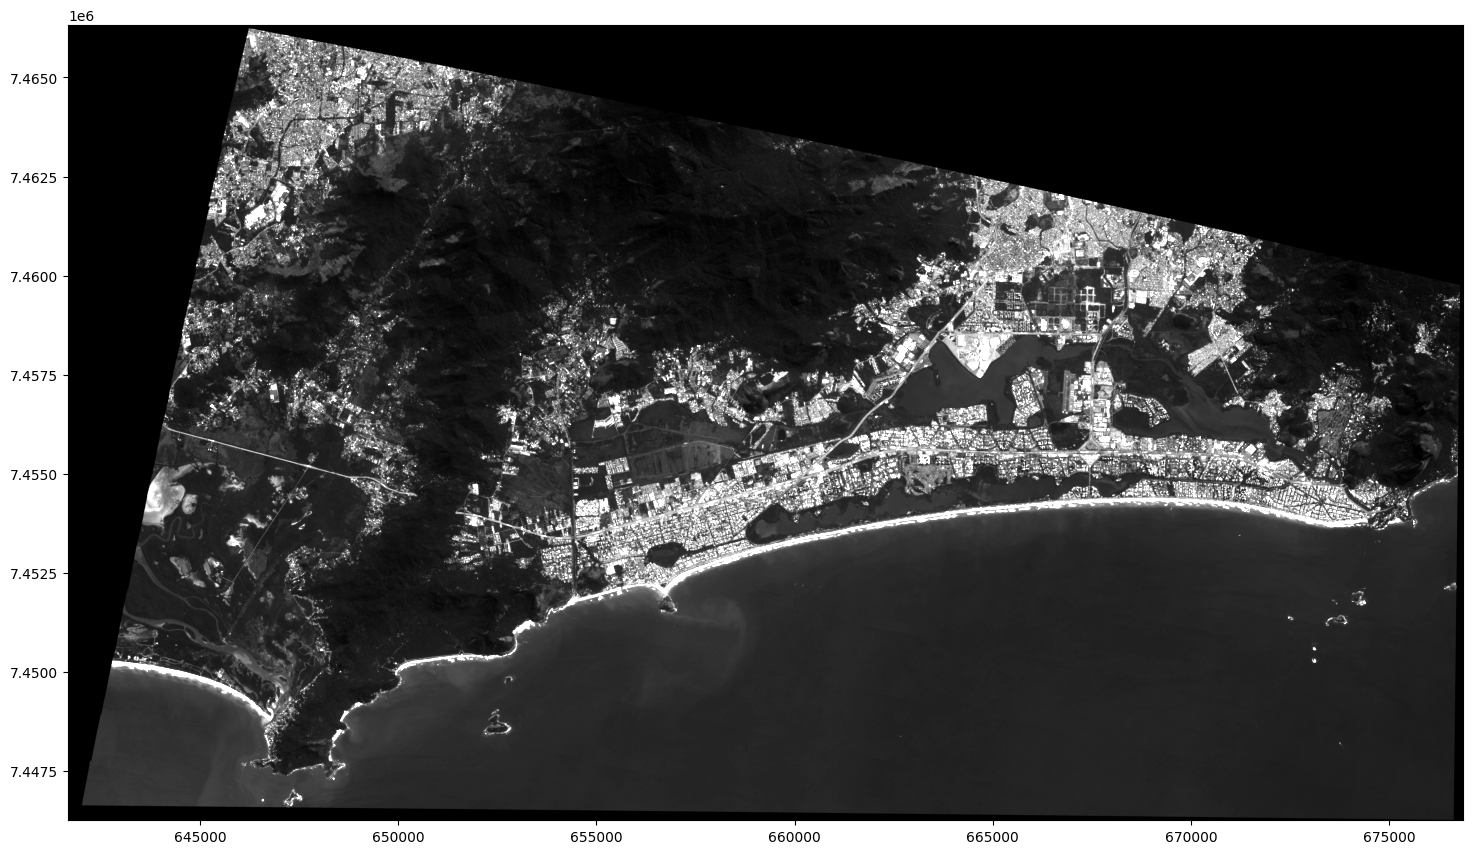

(0.0, 1.0, 0.0, 1.0)

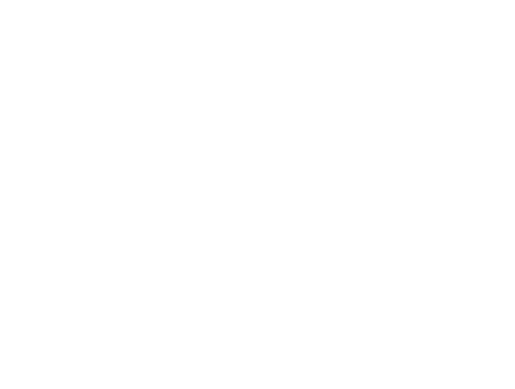

In [4]:
from rasterio.plot import show
fig, ax = plt.subplots(figsize=(18,18))
vmin, vmax = np.percentile(img[0], (2,98))  # 2-98% stretch
show(img[0], cmap='gray', transform=affine, vmin=vmin, vmax=vmax)
plt.axis('off')

In [7]:
img_reshaped=np.stack((img[0],img[1],img[2],img[3]),axis=-1)

In [8]:
ee = eea.NFINDR()

In [9]:
U = ee.extract(img_reshaped, 5, normalize=False)

In [18]:
wave = [0.45,0.52,0.63,0.77]

In [19]:
ee_axes = {}
ee_axes['wavelength'] = [float(i) for i in wave]
ee_axes['x']='Wavelength'
ee_axes['y']='Reflectance'

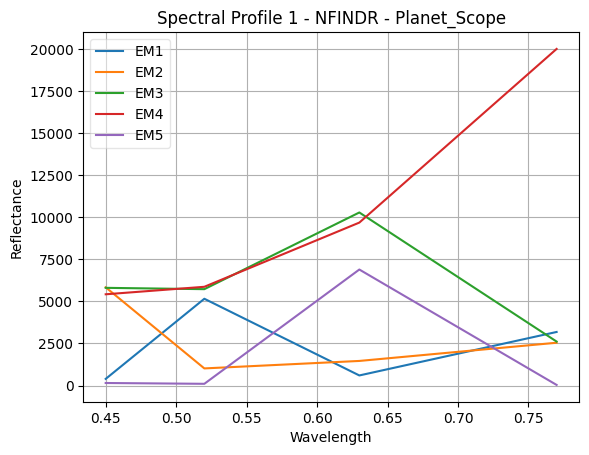

In [20]:
ee.display(axes=ee_axes,suffix='Planet_Scope')